# HandwrittenCharacterRecognition
Implementing the popular handwritten character recognition problem in Python with Keras and TensorFlow.

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Preparations
### Fetch
First get the dataset. It contains 28x28 black-white images of hand-written digits 0-9

In [8]:
mnist = tf.keras.datasets.mnist

Now we actually load the data and unpack it into four numpy arrays. `x_train` and `x_test` contain the images; `y_train` and `y_test` contain the corresponding labels. Each image is a 28x28 numpy array of 0 to 255 greyscale values.

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### Inspect
Here we plot some example images.

5


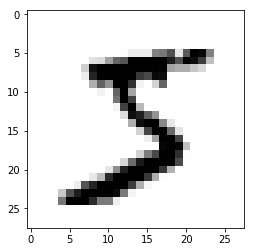

0


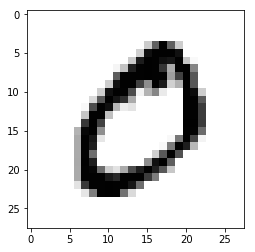

4


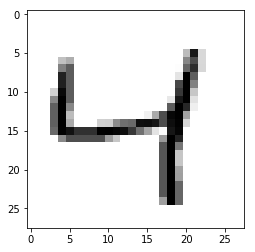

1


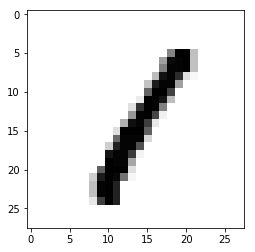

In [29]:
for i in range(4):
    print(y_train[i])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.show()

### Normalize

In [30]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Creating the model

In [115]:
model = tf.keras.models.Sequential()

### First layer

In [116]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

### Hidden layers
*ReLU* as activation function, because it is nowadays proven to be the most versatile and the go-to option in almost every case.

In [117]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

### Output layer
*Softmax* as activation function, because we need a probability distribution. This is due to *ReLU* having outputs 0 to $\infty$ while *Softmax* has outputs 0 to 1. Notice that we have 10 outputs for 10 possible digits to be classified.

In [118]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### Compile the model
- `adam` optimizer (similar to *ReLU* as activation function) is the go-to optimizer when nothing special is needed.
- Other options analogously.

In [119]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the network

In [120]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 10s 173us/step - loss: 0.2606 - acc: 0.9233
Epoch 2/3
60000/60000 [==============================] - 8s 140us/step - loss: 0.1057 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 8s 140us/step - loss: 0.0720 - acc: 0.9769


## Test the network

In [121]:
loss, accuracy = model.evaluate(x_test, y_test)
f"Loss: {loss}, Accuracy: {accuracy}"

10000/10000 [==============================] - 1s 88us/step


'Loss: 0.09450166525822133, Accuracy: 0.9703'